# Time Series forecasting with Facebook Prophet 

## What you'll learn in this course 

With Machine Learning comes very specific data: Time series. That type of data should be treated very specifically. In this course, you'll learn:

* How to handle Time Series data 
* What are the common models 
* Create time series forecasting with Prophet 
* The model behind Prophet
* Include seasonality, holidays and other specific events in your forecast 

## What are Time Series 🤔🤔

Simply put time series are data based on time. For example you can have:

* Sales forecast
* Spread of a virus over time 
* Stock prices prediction
* Weather forecasting 
* ...


## Models associated with Time Series 📈📈

When you are doing time series forecasting. You can use plenty different types of models. Among the most popular are: 

* Moving averages
* Auto-correlations 
* Autoregressive Integrated Moving Average (ARIMA)

## Facebook Prophet 🔮🔮

Prophet is an open source project used for Time Series Forecasting. Basically, Prophet rely on three components: 

$y(t) = g(t) + s(t) + h(t) + \varepsilon_{t}$

where 

$y(t)$ - forecast 

$g(t)$ - trend 

$s(t)$ - seasonality or periodical changes

$h(t)$ - holidays 

$\varepsilon_{t}$ - Noise 

We'll review each of these components in this course. 




## Install Prophet

:::warning Installation and running
The latest version of Prophet can't be installed on JULIE's workspaces. The following code examples have to be executed in [Google colab](https://colab.research.google.com/)
:::


## Example with Finance Data 

For the rest of the course, we'll be using financial data from Yahoo and its `yfinance` library

In [1]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import fbprophet

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on colab

In [3]:
!pip install -q yfinance

[*********************100%***********************]  1 of 1 completed


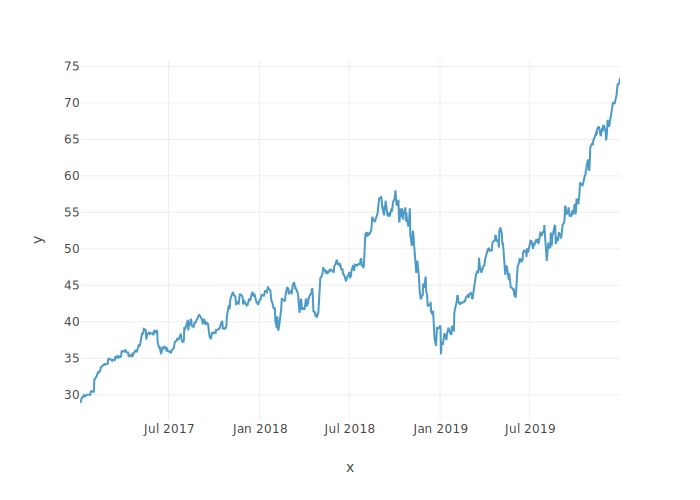

In [4]:
# Import the plotting library
import matplotlib.pyplot as plt
import yfinance as yf  

# Get the data of the stock AAPL
data = yf.download('AAPL','2017-01-01','2020-01-01')

# Plot the close price of the AAPL
fig = px.line(x = data['Close'].index, y = data['Close'])
fig.show()

In [5]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03 00:00:00-05:00,28.950001,29.082500,28.690001,29.037500,27.219831,115127600
2017-01-04 00:00:00-05:00,28.962500,29.127501,28.937500,29.004999,27.189367,84472400
2017-01-05 00:00:00-05:00,28.980000,29.215000,28.952499,29.152500,27.327641,88774400
2017-01-06 00:00:00-05:00,29.195000,29.540001,29.117500,29.477501,27.632296,127007600
2017-01-09 00:00:00-05:00,29.487499,29.857500,29.485001,29.747499,27.885389,134247600
...,...,...,...,...,...,...
2019-12-24 00:00:00-05:00,71.172501,71.222504,70.730003,71.067497,69.738724,48478800
2019-12-26 00:00:00-05:00,71.205002,72.495003,71.175003,72.477501,71.122360,93121200
2019-12-27 00:00:00-05:00,72.779999,73.492500,72.029999,72.449997,71.095375,146266000


Our goal is going to predict future stock prices of Apple Inc.

## Forecasting 🧙‍♂️🧙‍♂️

The best thing about Prophet is that it follows the same principles as `sklearn`. Making it very easy to use. Let's show a quick example. 

First Prophet needs to receive a DataFrame with the: 

* `ds` column corresponding to the time in YYYY-MM-DD format 
* `y` column corresponding to your target variable 

In [6]:
import pandas as pd 

# Format a dataframe for Prophet where you need to have a 'ds' column for time and 'y' column for prediction 

p_df = pd.DataFrame({
    "ds":data.index,
    "y": data["Open"]
}).reset_index(drop=True)

p_df['ds'] = p_df['ds'].dt.tz_localize(None) # remove timezone for compatibility with latest version of fbprophet

p_df.head()

,ds,y
0,2017-01-03,28.950001
1,2017-01-04,28.962500
2,2017-01-05,28.980000
3,2017-01-06,29.195000
4,2017-01-09,29.487499


Next, we'll instanciate a `Prophet` instance and `fit` it to our DataFrame 

In [7]:
from fbprophet import Prophet

m = Prophet()
m.fit(p_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Now we'll create predictions for future dates with Prophet

In [8]:
future = m.make_future_dataframe(periods=100) # We create 100 more days
future

,ds
0,2017-01-03
1,2017-01-04
2,2017-01-05
3,2017-01-06
4,2017-01-09
...,...
849,2020-04-05
850,2020-04-06
851,2020-04-07
852,2020-04-08


Let's make our predictions 

In [9]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
849,2020-04-05,77.916957,76.734516,86.465192,73.375976,82.521974,3.878814,3.878814,3.878814,0.662832,0.662832,0.662832,3.215982,3.215982,3.215982,0.0,0.0,0.0,81.795771
850,2020-04-06,78.010996,75.904131,85.801584,73.378332,82.718396,2.777353,2.777353,2.777353,-0.377973,-0.377973,-0.377973,3.155327,3.155327,3.155327,0.0,0.0,0.0,80.788349
851,2020-04-07,78.105035,75.979466,85.830758,73.390623,82.867360,2.801409,2.801409,2.801409,-0.288351,-0.288351,-0.288351,3.089760,3.089760,3.089760,0.0,0.0,0.0,80.906444
852,2020-04-08,78.199074,75.890319,86.330758,73.408056,83.001609,2.804857,2.804857,2.804857,-0.215353,-0.215353,-0.215353,3.020210,3.020210,3.020210,0.0,0.0,0.0,81.003931
853,2020-04-09,78.293113,75.669752,86.154665,73.364382,83.237148,2.736846,2.736846,2.736846,-0.210890,-0.210890,-0.210890,2.947736,2.947736,2.947736,0.0,0.0,0.0,81.029959


And finally plot the results with plotly

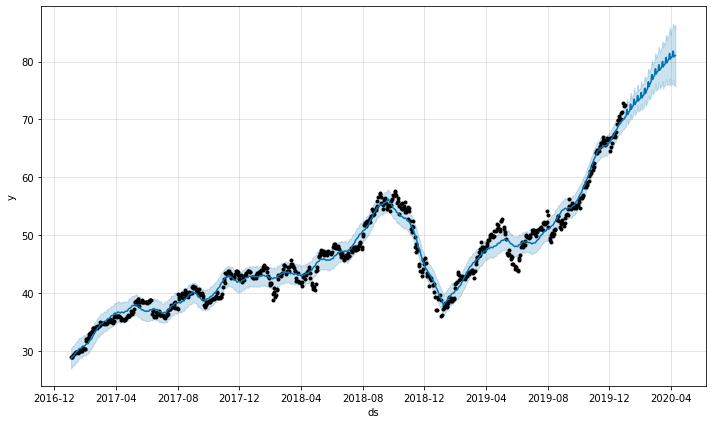

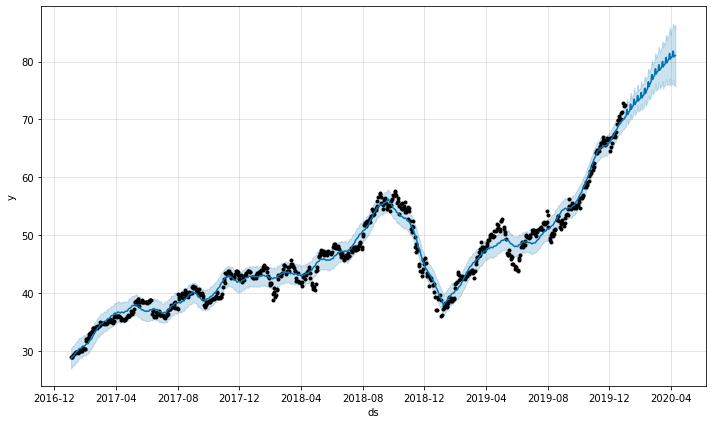

In [10]:
m.plot(forecast)

You can also plot each components of your trend. So that you can see the seasonality.

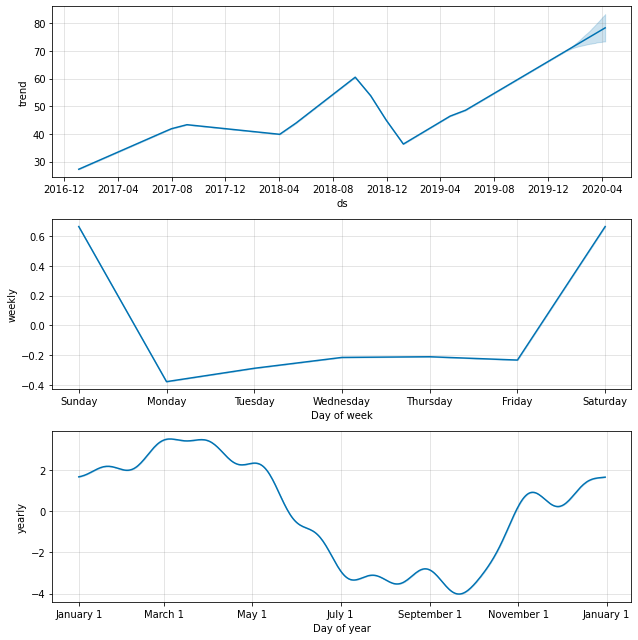

In [11]:
fig2 = m.plot_components(forecast)

## Handle Seasonality

One very cool feature that you can use with Prophet is to add seasonality. For example, you can add country holidays. 

In [12]:
m = Prophet()
m.add_country_holidays(country_name='US')
m.fit(p_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Check all the added holidays

In [13]:
m.train_holiday_names

0                 New Year's Day
1      New Year's Day (Observed)
2     Martin Luther King Jr. Day
3          Washington's Birthday
4                   Memorial Day
5               Independence Day
6                      Labor Day
7                   Columbus Day
8                   Veterans Day
9        Veterans Day (Observed)
10                  Thanksgiving
11                 Christmas Day
dtype: object

Check now its impact on your forecast 

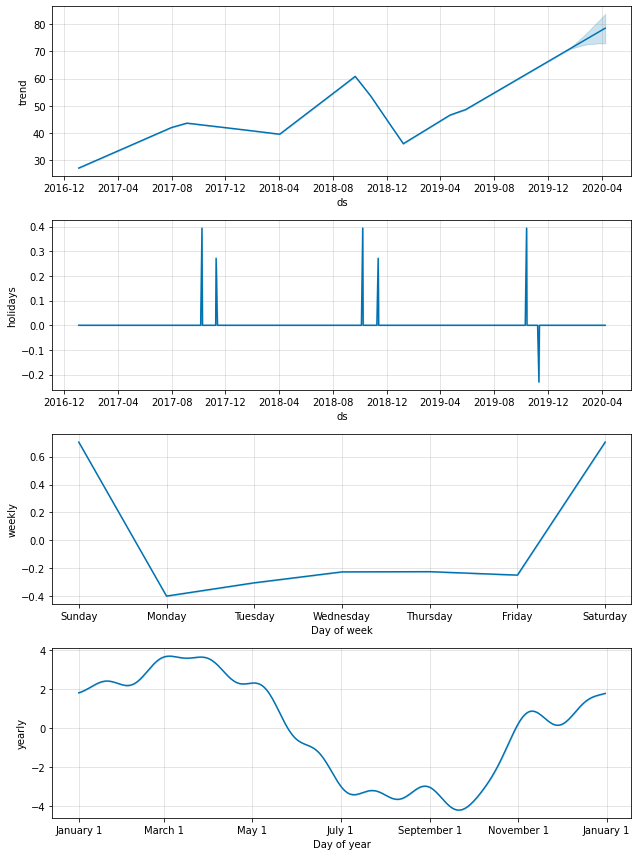

In [14]:
forecast = m.predict(future)
fig = m.plot_components(forecast)

You can also add manual holidays by providing a `holidays` DataFrame 

In [15]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-03,27.053650,26.932520,30.264138,27.053650,27.053650,0.0,0.0,0.0,0.0,...,-0.305462,-0.305462,-0.305462,1.855553,1.855553,1.855553,0.0,0.0,0.0,28.603741
1,2017-01-04,27.124821,27.056389,30.583079,27.124821,27.124821,0.0,0.0,0.0,0.0,...,-0.227093,-0.227093,-0.227093,1.887333,1.887333,1.887333,0.0,0.0,0.0,28.785062
2,2017-01-05,27.195993,27.230671,30.526065,27.195993,27.195993,0.0,0.0,0.0,0.0,...,-0.225491,-0.225491,-0.225491,1.921928,1.921928,1.921928,0.0,0.0,0.0,28.892430
3,2017-01-06,27.267164,27.146848,30.634902,27.267164,27.267164,0.0,0.0,0.0,0.0,...,-0.250176,-0.250176,-0.250176,1.959121,1.959121,1.959121,0.0,0.0,0.0,28.976109
4,2017-01-09,27.480678,27.326537,30.919142,27.480678,27.480678,0.0,0.0,0.0,0.0,...,-0.400804,-0.400804,-0.400804,2.081970,2.081970,2.081970,0.0,0.0,0.0,29.161845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,2020-04-05,78.144782,76.938556,87.685927,72.952279,83.055850,0.0,0.0,0.0,0.0,...,0.704513,0.704513,0.704513,3.337806,3.337806,3.337806,0.0,0.0,0.0,82.187100
850,2020-04-06,78.239576,75.580477,86.322133,72.902914,83.203816,0.0,0.0,0.0,0.0,...,-0.400804,-0.400804,-0.400804,3.271968,3.271968,3.271968,0.0,0.0,0.0,81.110741
851,2020-04-07,78.334371,75.786871,86.558630,72.954310,83.373449,0.0,0.0,0.0,0.0,...,-0.305462,-0.305462,-0.305462,3.200946,3.200946,3.200946,0.0,0.0,0.0,81.229856
852,2020-04-08,78.429166,75.920689,86.730514,73.024308,83.553360,0.0,0.0,0.0,0.0,...,-0.227093,-0.227093,-0.227093,3.125697,3.125697,3.125697,0.0,0.0,0.0,81.327770


In [16]:
thanksgiving = pd.DataFrame({
  'holiday': 'thanksgiving',
  'ds': pd.to_datetime(['2017-11-26', '2018-11-26', '2019-11-26']),
  'lower_window': 0,
  'upper_window': 1,
})

m = Prophet(holidays=thanksgiving)
#m.add_country_holidays(country_name='US')
m.fit(p_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
thanksgiving

,holiday,ds,lower_window,upper_window
0,thanksgiving,2017-11-26,0,1
1,thanksgiving,2018-11-26,0,1
2,thanksgiving,2019-11-26,0,1


Let's check the impact of a holiday simply by checking if we have positive or negative correlations in our prediction dataframe. 

In [18]:
forecast = m.predict(future)

In [19]:
forecast[forecast["ds"] == "2017-11-27"]["thanksgiving"]

227   -0.131872
Name: thanksgiving, dtype: float64

In [20]:
forecast.thanksgiving.value_counts()

 0.000000    849
-0.131872      3
-0.651895      2
Name: thanksgiving, dtype: int64

## Multi-variate forecasting 

Sometimes, you might want to create forecast not only with times but with also other variables. Prophet calls it Regressors. To add a regressor, you can simply do: 

In [21]:
# Get the data of Microsoft Stock
msft = yf.download('MSFT','2017-01-01','2020-01-01')

# Preprocess the data 
msft = pd.DataFrame({
    "ds":msft.index,
    "msft_stock_price": msft["Open"]
}).reset_index(drop=True)


msft.head()

[*********************100%***********************]  1 of 1 completed


,ds,msft_stock_price
0,2017-01-03 00:00:00-05:00,62.790001
1,2017-01-04 00:00:00-05:00,62.480000
2,2017-01-05 00:00:00-05:00,62.189999
3,2017-01-06 00:00:00-05:00,62.299999
4,2017-01-09 00:00:00-05:00,62.759998


Let's incorporate this column in our DataFrame

In [22]:
p_df["msft_stock_price"] = msft["msft_stock_price"]
p_df.head()

,ds,y,msft_stock_price
0,2017-01-03,28.950001,62.790001
1,2017-01-04,28.962500,62.480000
2,2017-01-05,28.980000,62.189999
3,2017-01-06,29.195000,62.299999
4,2017-01-09,29.487499,62.759998


In [23]:
m = Prophet()
m.add_regressor('msft_stock_price')

However, once you added a regressor, you absolutely need to have it in your train set AND in your predictions. Therefore, let's split our dataset 

In [24]:
# Train_test_split 
train_size = int(0.8*len(p_df))


X_train = p_df.iloc[:train_size, :]
X_test = p_df.iloc[train_size:, :]

X_train.head()

,ds,y,msft_stock_price
0,2017-01-03,28.950001,62.790001
1,2017-01-04,28.962500,62.480000
2,2017-01-05,28.980000,62.189999
3,2017-01-06,29.195000,62.299999
4,2017-01-09,29.487499,62.759998


In [25]:
m.fit(X_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


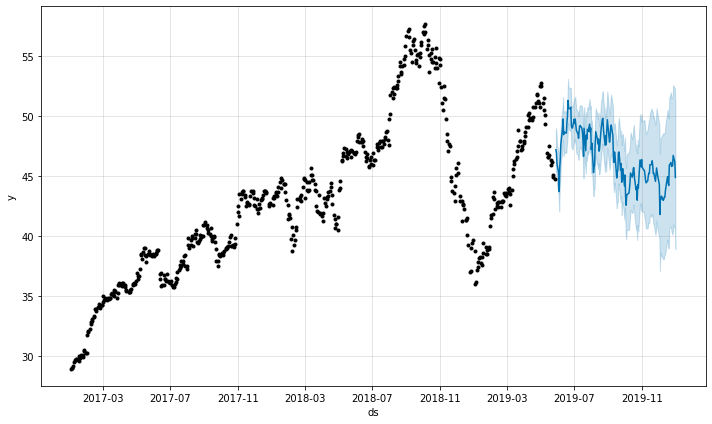

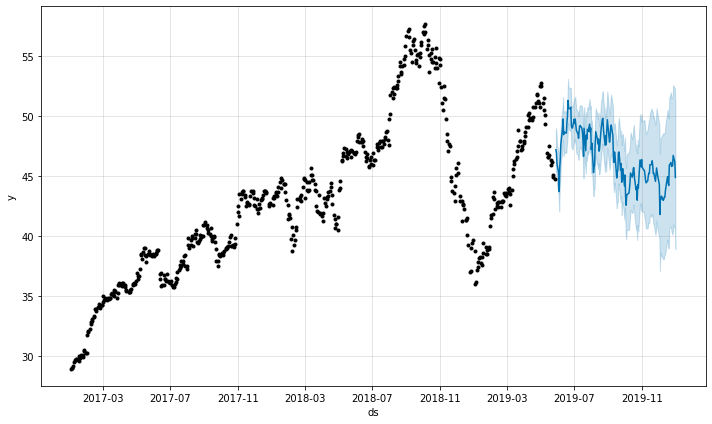

In [26]:
# Forecast
forecast = m.predict(X_test)

# Viz
m.plot(forecast)

In [27]:
future = m.make_future_dataframe(periods=1)
future

,ds
0,2017-01-03
1,2017-01-04
2,2017-01-05
3,2017-01-06
4,2017-01-09
...,...
599,2019-05-22
600,2019-05-23
601,2019-05-24
602,2019-05-28


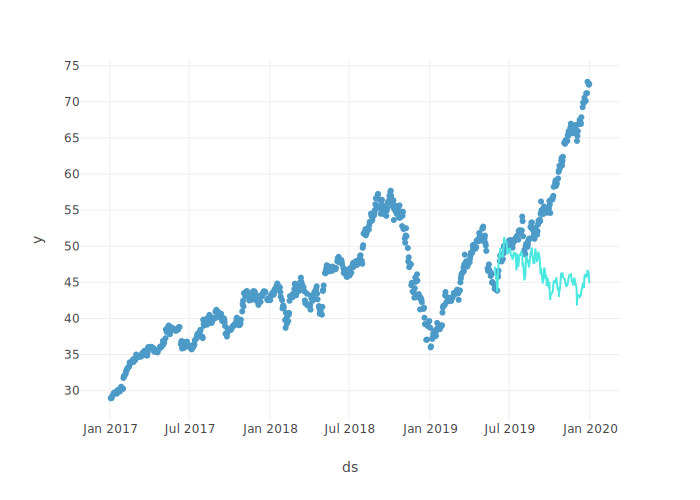

In [28]:
fig = px.scatter(p_df, x = "ds", y = "y")
fig.add_trace(px.line(forecast, x="ds", y="yhat").data[0])
fig['data'][1]['line']['color']="#4BE8E0"
fig.show()

## Resources 

* [Seasonality, Holiday Effects, And Regressors](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors)
* [Forecasting at Scale](https://peerj.com/preprints/3190/)
* [Introduction to Time Series Analysis](https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4.htm)
* [Time Series](https://en.wikipedia.org/wiki/Time_series#:~:text=A%20time%20series%20is%20a,sequence%20of%20discrete%2Dtime%20data.)